In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [0]:
#### Model parameters

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#### Data Preprocessing

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# function to plot results
def results(model, history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.show()

  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')
  plt.show()

  error = [1-a for a in history.history['acc']]
  val_error = [1-a for a in history.history['val_acc']]
  plt.plot(error)
  plt.plot(val_error)
  plt.title('model error')
  plt.ylabel('error')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')
  plt.show()

  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test Loss:', score[0])
  print('Test Error:', val_error[-1])
  print('Test Accuracy:', score[1])


In [0]:
#### Task 1

In [11]:
model1 = Sequential()
model1.add(Conv2D(6, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(16, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(120, activation='relu'))
model1.add(Dense(84, activation='relu'))

model1.add(Dense(num_classes, activation='softmax'))

In [12]:
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

In [13]:
history1 = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 20s 339us/step - loss: 0.7238 - acc: 0.7817 - val_loss: 0.2555 - val_acc: 0.9266
Epoch 2/12
60000/60000 [==============================] - 19s 323us/step - loss: 0.2284 - acc: 0.9313 - val_loss: 0.1858 - val_acc: 0.9445
Epoch 3/12
60000/60000 [==============================] - 19s 321us/step - loss: 0.1751 - acc: 0.9470 - val_loss: 0.1473 - val_acc: 0.9562
Epoch 4/12
60000/60000 [==============================] - 19s 321us/step - loss: 0.1441 - acc: 0.9576 - val_loss: 0.1190 - val_acc: 0.9648
Epoch 5/12
60000/60000 [==============================] - 20s 326us/step - loss: 0.1231 - acc: 0.9633 - val_loss: 0.1079 - val_acc: 0.9665
Epoch 6/12
60000/60000 [==============================] - 20s 325us/step - loss: 0.1083 - acc: 0.9682 - val_loss: 0.0923 - val_acc: 0.9721
Epoch 7/12
600

******  Results for Task 1 (Baseline accuracy and error) *******


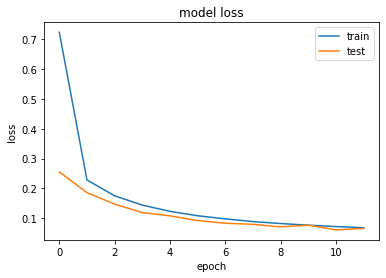

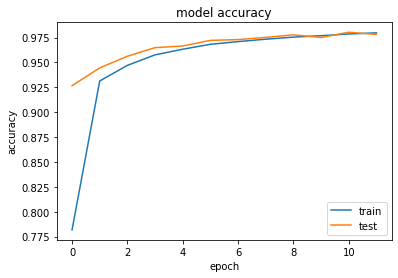

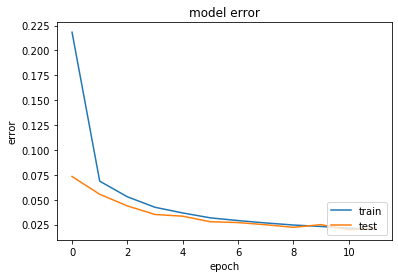

Test Loss: 0.06590052737714723
Test Error: 0.02190000000000003
Test Accuracy: 0.9781


In [22]:
print("******  Results for Task 1 (Baseline accuracy and error) *******")
results(model1, history1)

In [0]:
#### Task 2

In [0]:
model2 = Sequential()
#kernel size 5X5
model2.add(Conv2D(6, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2)))
#kernel size 5X5
model2.add(Conv2D(16, (5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(120, activation='relu'))
model2.add(Dense(84, activation='relu'))

model2.add(Dense(num_classes, activation='softmax'))

In [24]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 23s 378us/step - loss: 0.7755 - acc: 0.7670 - val_loss: 0.2440 - val_acc: 0.9285
Epoch 2/12
60000/60000 [==============================] - 22s 369us/step - loss: 0.2200 - acc: 0.9335 - val_loss: 0.1758 - val_acc: 0.9479
Epoch 3/12
60000/60000 [==============================] - 22s 371us/step - loss: 0.1701 - acc: 0.9484 - val_loss: 0.1420 - val_acc: 0.9559
Epoch 4/12
60000/60000 [==============================] - 22s 369us/step - loss: 0.1436 - acc: 0.9573 - val_loss: 0.1244 - val_acc: 0.9609
Epoch 5/12
60000/60000 [==============================] - 22s 372us/step - loss: 0.1242 - acc: 0.9628 - val_loss: 0.1085 - val_acc: 0.9659
Epoch 6/12
60000/60000 [==============================] - 22s 369us/step - loss: 0.1109 - acc: 0.9663 - val_loss: 0.0978 - val_acc: 0.9695
Epoch 7/12
60000/60000 [==============================] - 22s 374us/step - loss: 0.1005 - acc: 0.9696 - val_loss: 0.

******  Results for Task 2 (Kenrel size = (5 X 5) ) *******


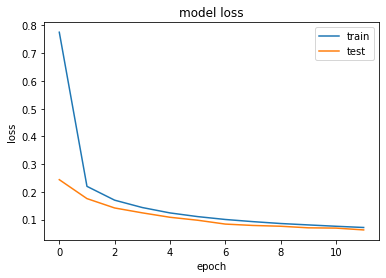

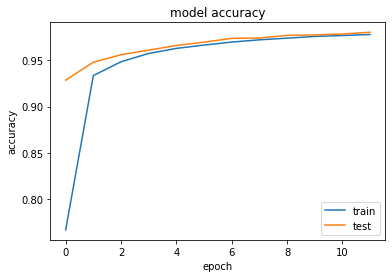

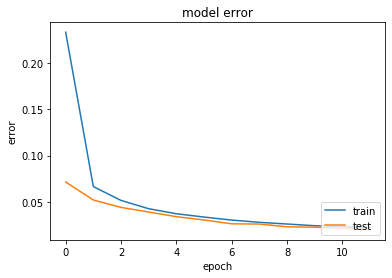

Test Loss: 0.06290206952989101
Test Error: 0.01980000000000004
Test Accuracy: 0.9802


In [25]:
print("******  Results for Task 2 (Kenrel size = (5 X 5) ) *******")
results(model2, history2)

In [0]:
#### Task 3

In [0]:
model3 = Sequential()
#feature map = 8
model3.add(Conv2D(8, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=(2, 2)))
#feature map = 32
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(120, activation='relu'))
model3.add(Dense(84, activation='relu'))

model3.add(Dense(num_classes, activation='softmax'))

In [28]:
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 23s 379us/step - loss: 0.7756 - acc: 0.7600 - val_loss: 0.2592 - val_acc: 0.9218
Epoch 2/12
60000/60000 [==============================] - 22s 361us/step - loss: 0.2282 - acc: 0.9315 - val_loss: 0.1705 - val_acc: 0.9497
Epoch 3/12
60000/60000 [==============================] - 21s 357us/step - loss: 0.1646 - acc: 0.9511 - val_loss: 0.1290 - val_acc: 0.9606
Epoch 4/12
60000/60000 [==============================] - 22s 359us/step - loss: 0.1298 - acc: 0.9608 - val_loss: 0.1087 - val_acc: 0.9674
Epoch 5/12
60000/60000 [==============================] - 21s 356us/step - loss: 0.1086 - acc: 0.9677 - val_loss: 0.0905 - val_acc: 0.9723
Epoch 6/12
60000/60000 [==============================] - 21s 351us/step - loss: 0.0945 - acc: 0.9712 - val_loss: 0.0808 - val_acc: 0.9753
Epoch 7/12
60000/60000 [==============================] - 21s 350us/step - loss: 0.0834 - acc: 0.9749 - val_loss: 0.

******  Results for Task 3  (Feature Maps 8 and 32 for Conv1 and Conv 2 resp. *******


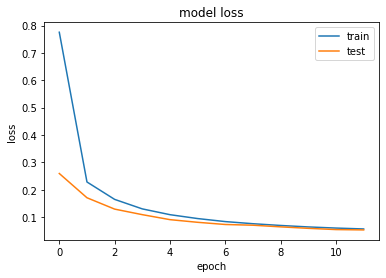

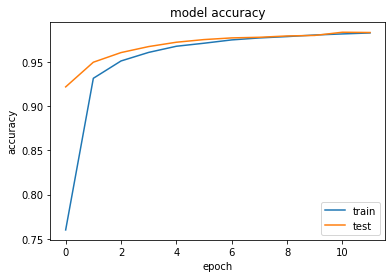

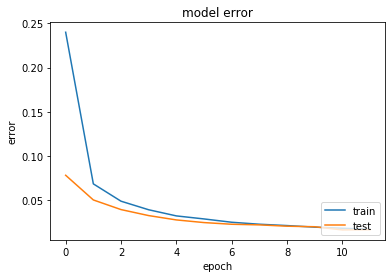

Test Loss: 0.052939724707463755
Test Error: 0.016700000000000048
Test Accuracy: 0.9833


In [29]:
print("******  Results for Task 3  (Feature Maps 8 and 32 for Conv1 and Conv 2 resp. *******")
results(model3, history3)